In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [22]:
# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the original distribution
original_mean = 10
original_std_dev = 5
sample_size = 30  # Number of observations in each sample
num_samples = 1000  # Number of samples

# Generate samples from the original distribution
original_data = np.random.normal(original_mean, original_std_dev, size=(num_samples, sample_size))

In [23]:
print(original_data.shape)

(1000, 30)


In [24]:
print(original_data)

[[12.48357077  9.30867849 13.23844269 ... 11.87849009  6.99680655
   8.54153125]
 [ 6.99146694 19.26139092  9.93251388 ...  8.45393812 11.65631716
  14.87772564]
 [ 7.60412881  9.07170512  4.46832513 ... 11.64375555  7.35119898
  12.56633717]
 ...
 [ 7.98483518  8.62617354 10.70371247 ... 11.26701833  9.70162588
  14.30371213]
 [ 8.71478487 16.9577617   0.76201221 ...  4.43438374 13.36322556
  13.33635996]
 [13.31136124 12.1379816  14.72349436 ...  7.49316342  0.53821588
   8.85557896]]


In [25]:
# Calculate the means of each sample
sample_means = np.mean(original_data, axis=1)

In [26]:
print(sample_means.shape)

(1000,)


In [27]:
#print(sample_means)

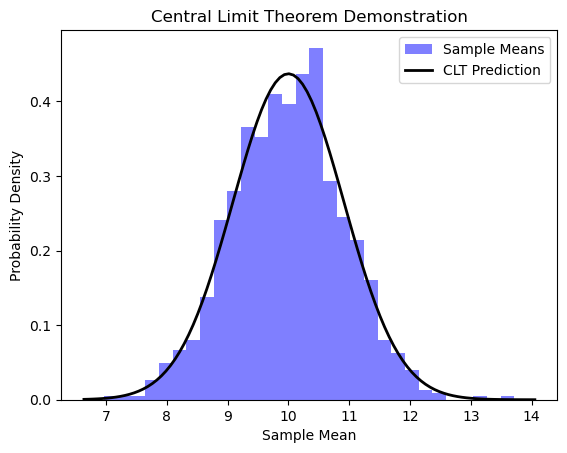

In [28]:
# Plot the histogram of sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.5, color='b', label='Sample Means')

# Plot the theoretical normal distribution (CLT prediction)
clt_mean = original_mean  # Mean of the original distribution
clt_std_dev = original_std_dev / np.sqrt(sample_size)  # Standard deviation of the sample means

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, clt_mean, clt_std_dev)
plt.plot(x, p, 'k', linewidth=2, label='CLT Prediction')

plt.title('Central Limit Theorem Demonstration')
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


    Let's consider a scenario where we have a non-normally distributed population, and we want to demonstrate how the Central Limit Theorem (CLT) works in practice.

    Imagine we have a population of daily step counts for a group of people, and the distribution of daily step counts is not normal. We want to show that even though the original distribution is not normal, the distribution of sample means will become approximately normal as we increase the sample size.

        We generate a non-normally distributed population using an exponential distribution (you can replace this with your real-world data).
       
       We draw samples of different sizes from the population and calculate the means of each sample.
       
       We plot the original population distribution and the distributions of sample means for different sample sizes, comparing them with the theoretical normal distribution predicted by the CLT.
       
       As you increase the sample size, you'll observe that the distribution of sample means becomes more normal, supporting the Central Limit Theorem. This is a common scenario in real-world applications where we often work with sample means, and the CLT allows us to make statistical inferences even when the original population distribution is not known or is not normal.

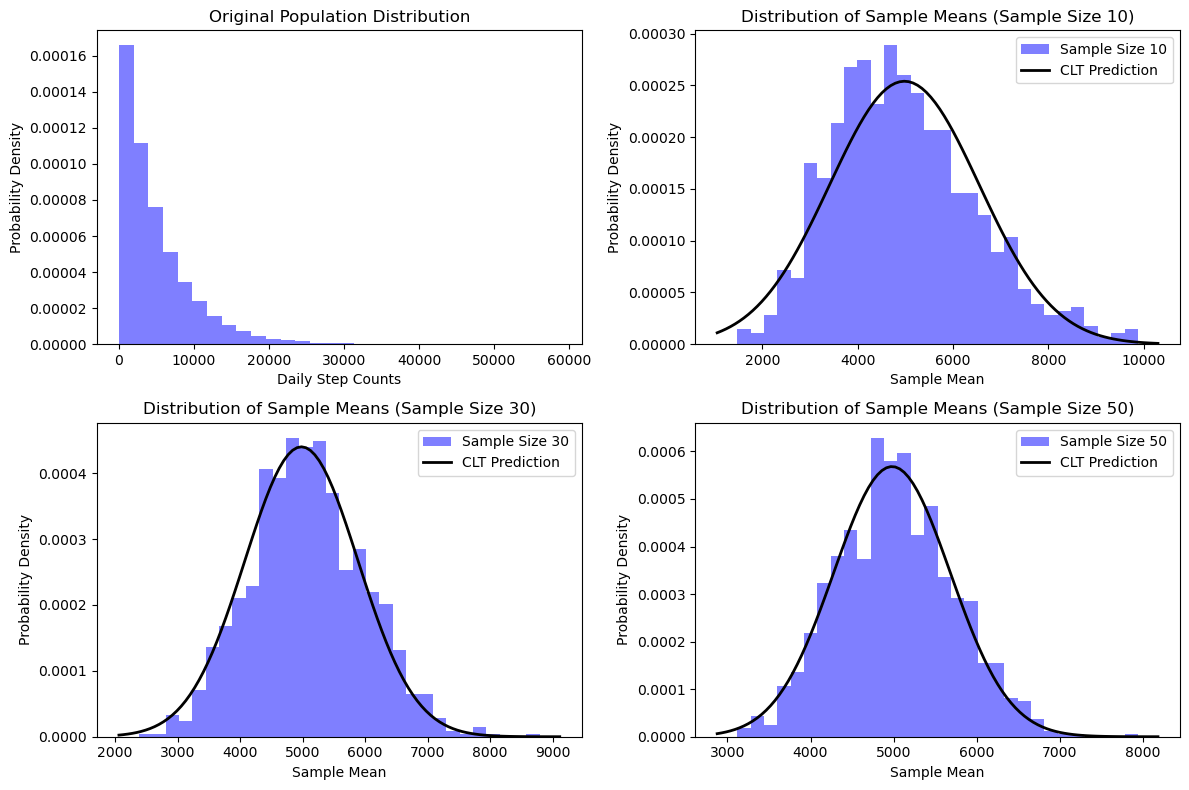

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Generate non-normally distributed population data (e.g., daily step counts)
population_data = np.random.exponential(scale=5000, size=100000)

# Define parameters for the original distribution
population_mean = np.mean(population_data)
population_std_dev = np.std(population_data)

# Number of samples to draw
num_samples = 1000

# List to store sample means
sample_means = []

# Different sample sizes to demonstrate the effect
sample_sizes = [10, 30, 50]

# Generate samples and calculate means
for size in sample_sizes:
    means = np.mean(np.random.choice(population_data, size=(num_samples, size)), axis=1)
    sample_means.append(means)

# Plot the original distribution
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(population_data, bins=30, density=True, alpha=0.5, color='b')
plt.title('Original Population Distribution')
plt.xlabel('Daily Step Counts')
plt.ylabel('Probability Density')

# Plot the distributions of sample means for different sample sizes
for i, size in enumerate(sample_sizes):
    plt.subplot(2, 2, i + 2)
    plt.hist(sample_means[i], bins=30, density=True, alpha=0.5, color='b', label=f'Sample Size {size}')
    
    # Plot the theoretical normal distribution (CLT prediction)
    clt_std_dev = population_std_dev / np.sqrt(size)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, population_mean, clt_std_dev)
    plt.plot(x, p, 'k', linewidth=2, label='CLT Prediction')
    
    plt.title(f'Distribution of Sample Means (Sample Size {size})')
    plt.xlabel('Sample Mean')
    plt.ylabel('Probability Density')
    plt.legend()

plt.tight_layout()
plt.show()
